In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('dataset.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6840 entries, 0 to 6839
Data columns (total 40 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     6840 non-null   int64  
 1   Date           6840 non-null   object 
 2   HomeTeam       6840 non-null   object 
 3   AwayTeam       6840 non-null   object 
 4   FTHG           6840 non-null   int64  
 5   FTAG           6840 non-null   int64  
 6   FTR            6840 non-null   object 
 7   HTGS           6840 non-null   int64  
 8   ATGS           6840 non-null   int64  
 9   HTGC           6840 non-null   int64  
 10  ATGC           6840 non-null   int64  
 11  HTP            6840 non-null   float64
 12  ATP            6840 non-null   float64
 13  HM1            6840 non-null   object 
 14  HM2            6840 non-null   object 
 15  HM3            6840 non-null   object 
 16  HM4            6840 non-null   object 
 17  HM5            6840 non-null   object 
 18  AM1     

In [3]:
def plot_correlation_matrix(df):
    df_numeric = df.select_dtypes(include=['float64', 'int64'])
    if len(df_numeric.columns) > 0:
        
        correlation_matrix = df_numeric.corr()
        plt.figure(figsize=(20, 10))
        sns.heatmap(correlation_matrix, 
                annot=True, 
                linewidths=0.5, 
                cmap="YlGnBu")
        plt.title('Matrice de corrélation')
        plt.show()
    else:
        print('Aucune variable numérique dans ce DataFrame')

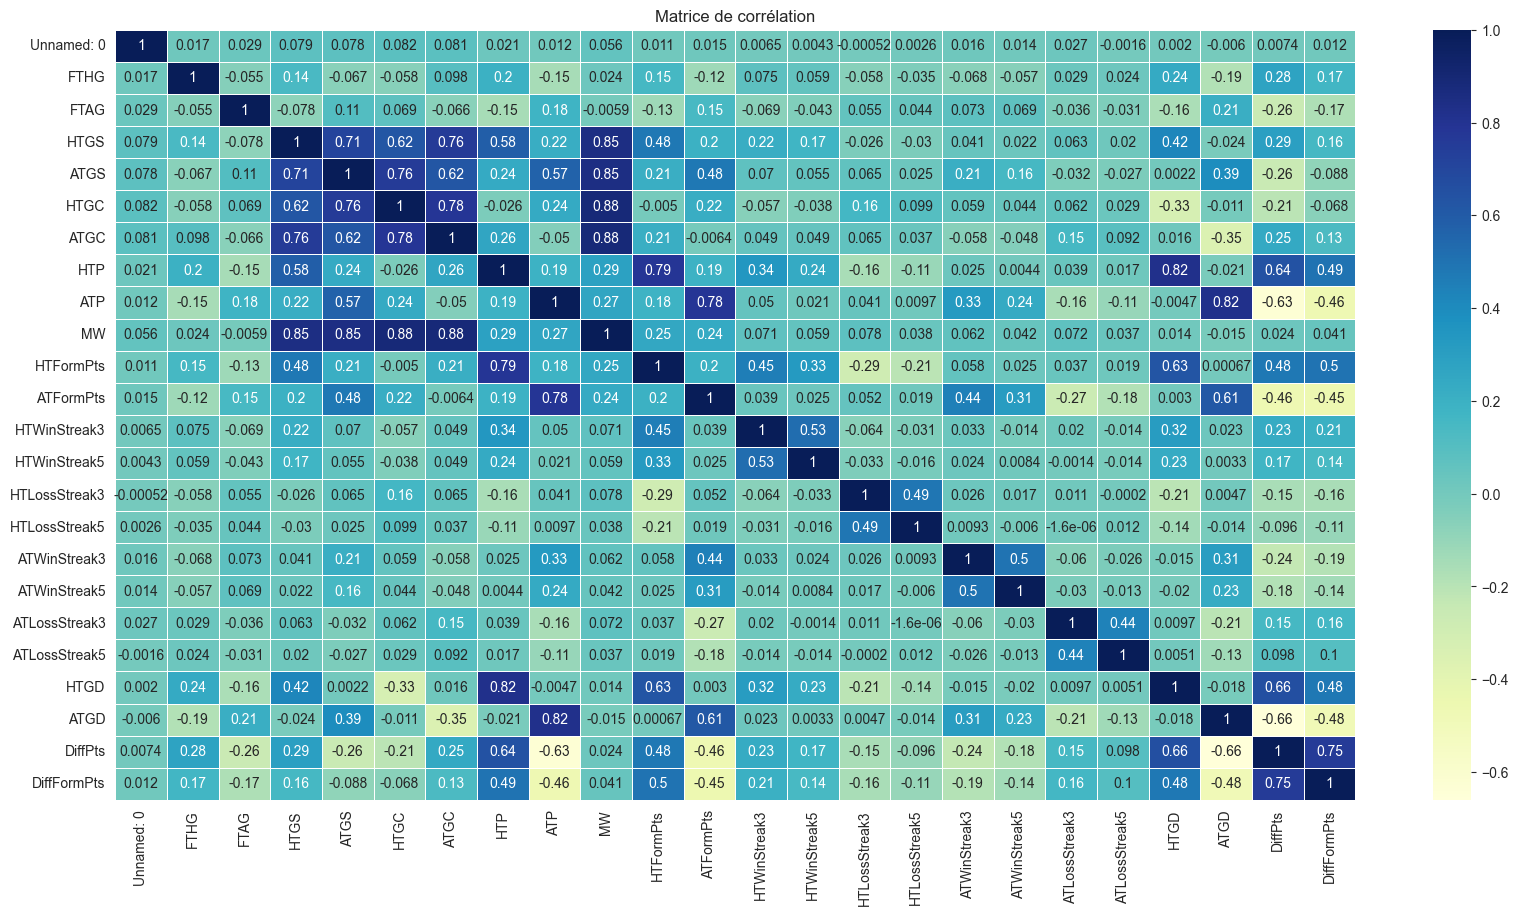

In [ ]:
plot_correlation_matrix(data)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib

In [ ]:
team = pd.read_csv('team_dict.csv')
team_dict = dict(zip(team.Team, team.ID))
print(team_dict)

In [ ]:
data['HomeTeam'] = data['HomeTeam'].map(team_dict)
data['AwayTeam'] = data['AwayTeam'].map(team_dict)
data['FTR'] = data['FTR'].apply(lambda x: 1 if x == 'H' else 0)
print(data)

In [ ]:
features = ['HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'HTGS', 'ATGS', 'HTGC'
            , 'ATGC', 'HTP', 'ATP', 'MW', 'HTFormPts', 'ATFormPts'
            , 'HTWinStreak3', 'HTWinStreak5', 'HTLossStreak3', 'HTLossStreak5'
            , 'ATWinStreak3', 'ATWinStreak5', 'ATLossStreak3', 'ATLossStreak5'
            , 'HTGD', 'ATGD', 'DiffPts', 'DiffFormPts']
X = data[features]
y = data['FTR']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

In [ ]:
clf = RandomForestClassifier(n_estimators = 200, random_state = 42)
clf.fit(X_train, y_train)

In [ ]:
y_pred = clf.predict(X_test)
# Calculation accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy: .4f}')

joblib.dump(clf, 'Random_forest.sav')